# **Drive Data Analysis - K Mean Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Data /Driver_data.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,Driver_Id,Mean_Dist_Day,Mean_over_speed
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


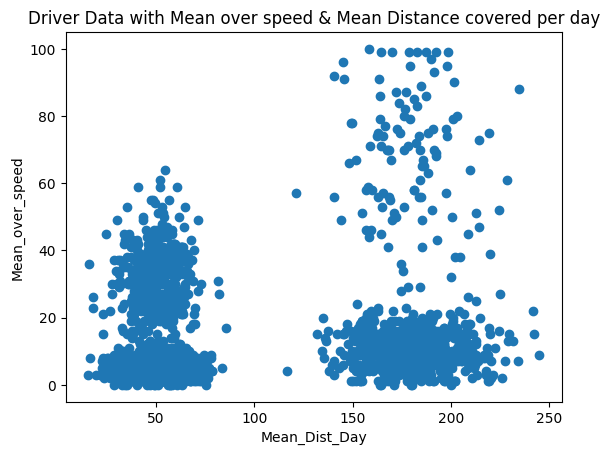

In [5]:
plt.scatter(df.Mean_Dist_Day,df.Mean_over_speed)
plt.xlabel('Mean_Dist_Day')
plt.ylabel('Mean_over_speed')
plt.title('Driver Data with Mean over speed & Mean Distance covered per day')
plt.show()

In [6]:
# Assuming 4 clusters
model_km = KMeans(n_clusters=4)
y_predict = model_km.fit_predict(df[['Mean_Dist_Day', 'Mean_over_speed']])
y_predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [7]:
df['cluster'] = y_predict
df.head()

,Driver_Id,Mean_Dist_Day,Mean_over_speed,cluster
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2


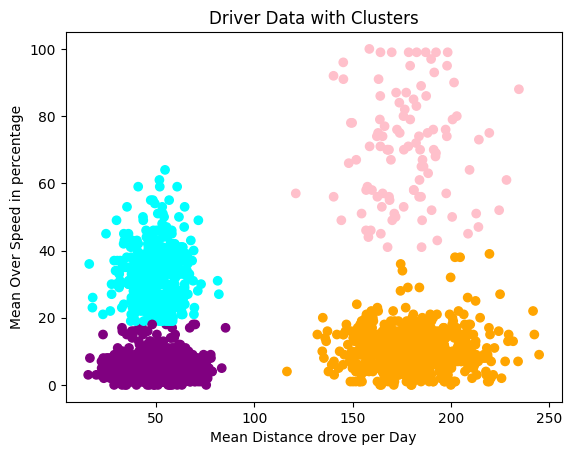

In [8]:
# Example colors for 3 clusters
colors = ['purple', 'orange', 'cyan','pink']
plt.scatter(df.Mean_Dist_Day, df.Mean_over_speed, c=df['cluster'], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Mean Distance drove per Day')
plt.ylabel('Mean Over Speed in percentage')
plt.title('Driver Data with Clusters')
plt.show()

In [9]:
#shows the cluster centers for the four clusters

model_km.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [ 50.40482436,  32.36533958],
       [177.83509615,  70.28846154]])

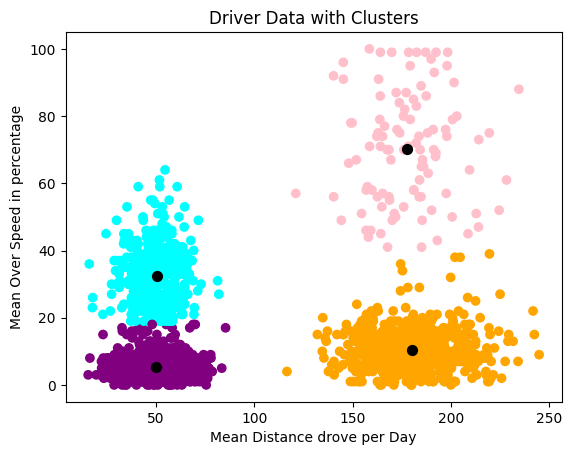

In [10]:
colors = ['purple', 'orange', 'cyan','pink']
plt.scatter(df.Mean_Dist_Day, df.Mean_over_speed, c=df['cluster'], cmap=matplotlib.colors.ListedColormap(colors))

#plotting rhe center mark of each clusters in the map
plt.scatter(model_km.cluster_centers_[:,0], model_km.cluster_centers_[:,1], color='black', marker='.', s=200)

plt.xlabel('Mean Distance drove per Day')
plt.ylabel('Mean Over Speed in percentage')
plt.title('Driver Data with Clusters')
plt.show()

In [11]:
#experimenting with different numbers of clusters (from 1 to 9) and
#calculates the inertia (SSE) for each configuration.
#The goal is to find the "elbow point" in a plot of SSE versus the number of clusters.

km_rng = range(1, 30)
sse = [] #sumofsquarederrors #eventually it has to zero

for k in km_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Mean_Dist_Day', 'Mean_over_speed']])
    sse.append(km.inertia_)

In [12]:
#errors decrease as it goes on and reduces eventually reducing sum of squared errors
sse

[12184626.129627967,
 1316420.8509477214,
 1119909.4056725106,
 719603.969082251,
 620972.1550430395,
 481257.7578066317,
 320037.2531977752,
 298837.9867734656,
 286549.7287048924,
 231272.66616435122,
 211454.7506368004,
 189218.0552119917,
 179738.05405726336,
 162850.6775993847,
 163108.65966788883,
 152887.9869266608,
 137851.21568924526,
 130850.32829114508,
 122323.10009944314,
 118724.75072872844,
 117624.93531034589,
 108053.71248394293,
 103877.09586776691,
 101288.63434732532,
 99641.86067195174,
 94826.12233528668,
 89079.25268048572,
 84836.4720963467,
 83950.75460168092]

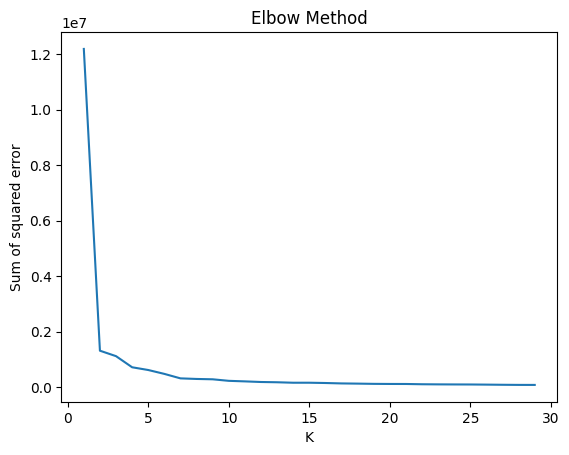

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(km_rng, sse)
plt.title('Elbow Method')
plt.show()

#showing elbow chart